# TAREA FINAL MASTER

Analizar un dataset Airbnb Italy (Ciudad de Roma)

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/gbergamo74/airbnb-italy-analysis/main/Airbnb%20in%20Italy.csv"
df = pd.read_csv(url)

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,Tranquillità immersa nel verde con due laghi m...,https://a0.muscache.com/pictures/68d7eb8c-e5b6...,68534156,...,4.85,4.65,4.80,NaN,f,2,0,2,0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,...,4.53,4.40,4.20,NaN,t,1,1,0,0,1.64
3,2903,https://www.airbnb.com/rooms/2903,20220911230914,2022-09-12,city scrape,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,NaN,https://a0.muscache.com/pictures/6315103/3f4d3...,3280,...,4.70,4.74,4.48,NaN,f,3,0,3,0,0.33
4,104339,https://www.airbnb.com/rooms/104339,20220911230914,2022-09-12,previous scrape,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...","Il quartiere ""San Paolo"" è parte integrante de...",https://a0.muscache.com/pictures/739258/4146f6...,543054,...,5.00,4.83,4.83,NaN,f,3,1,2,0,0.05


In [2]:
print("Shape:", df.shape)
df.info()


Shape: (24782, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24782 entries, 0 to 24781
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24782 non-null  int64  
 1   listing_url                                   24782 non-null  object 
 2   scrape_id                                     24782 non-null  int64  
 3   last_scraped                                  24782 non-null  object 
 4   source                                        24782 non-null  object 
 5   name                                          24779 non-null  object 
 6   description                                   24292 non-null  object 
 7   neighborhood_overview                         15433 non-null  object 
 8   picture_url                                   24782 non-null  object 
 9   host_id                                   

Crear un análisis descriptivo del conjunto

/tmp/ipython-input-3-250411253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
/tmp/ipython-input-3-250411253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


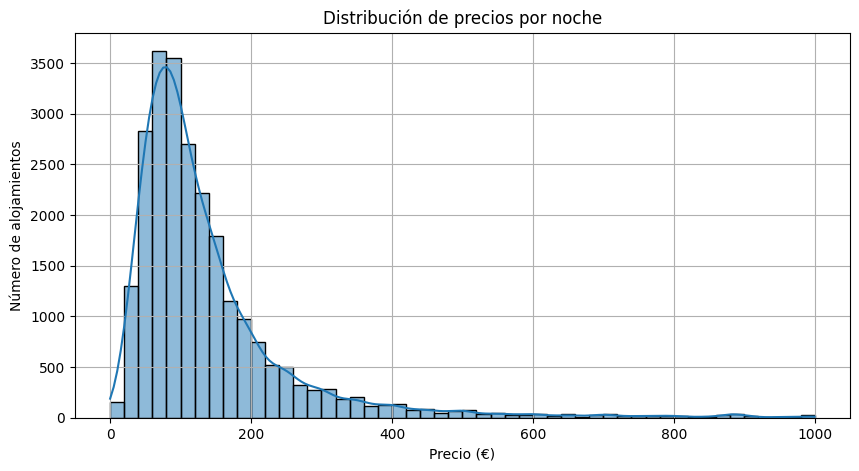

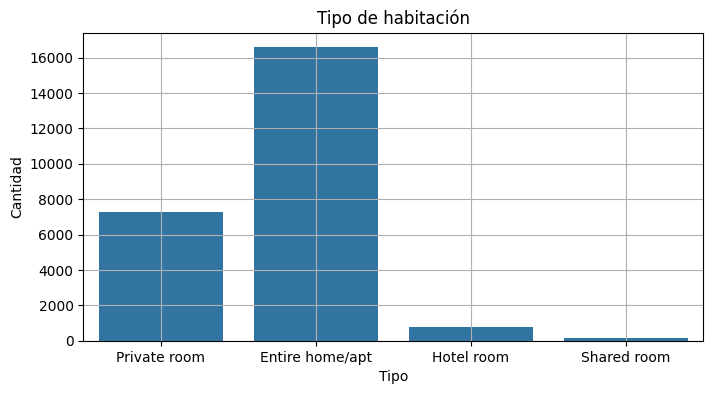

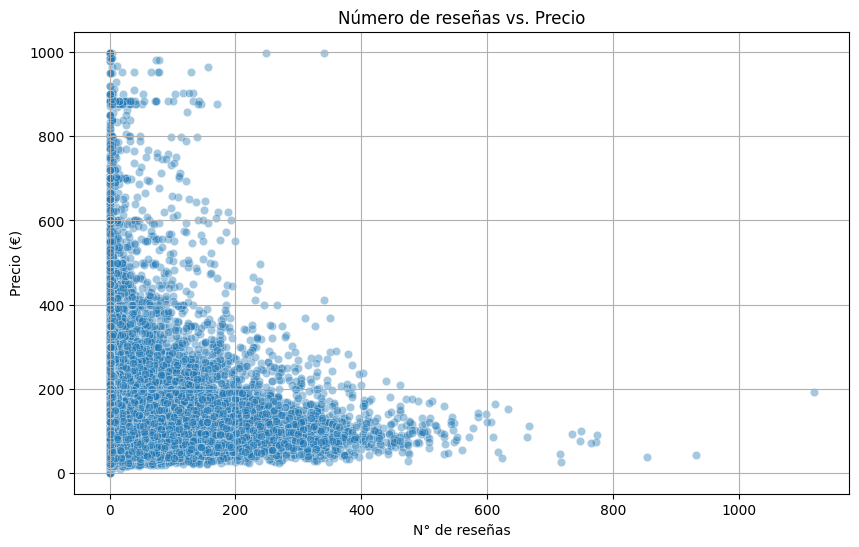

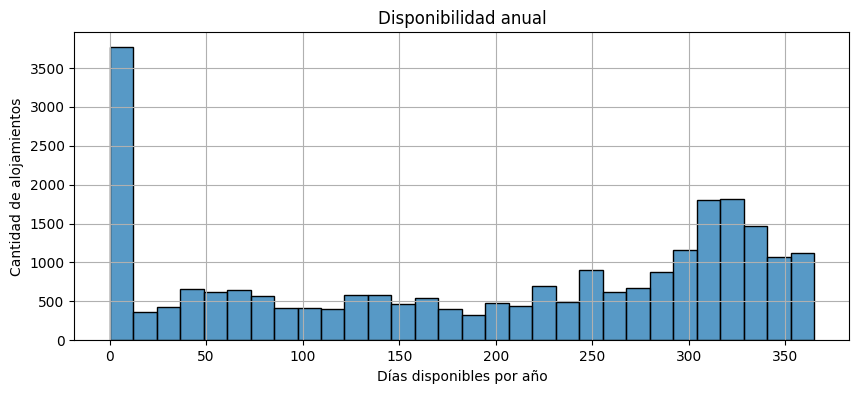

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Las columnas principales
df = df[['name', 'room_type', 'price', 'number_of_reviews', 'availability_365', 'latitude', 'longitude']]

df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Eliminar valores extremos para visualización
df_filtered = df[df['price'] < 1000]

# Gráfico 1: Distribución de precios
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title("Distribución de precios por noche")
plt.xlabel("Precio (€)")
plt.ylabel("Número de alojamientos")
plt.grid(True)
plt.show()

# Gráfico 2: Tipos de habitación
plt.figure(figsize=(8,4))
sns.countplot(x='room_type', data=df)
plt.title("Tipo de habitación")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# Gráfico 3: Reseñas vs. precio
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_reviews', y='price', data=df_filtered, alpha=0.4)
plt.title("Número de reseñas vs. Precio")
plt.xlabel("N° de reseñas")
plt.ylabel("Precio (€)")
plt.grid(True)
plt.show()

# Gráfico 4: Disponibilidad anual
plt.figure(figsize=(10,4))
sns.histplot(df['availability_365'], bins=30, kde=False)
plt.title("Disponibilidad anual")
plt.xlabel("Días disponibles por año")
plt.ylabel("Cantidad de alojamientos")
plt.grid(True)
plt.show()




Realizar las transformaciones que se consideren más
adecuadas o relevantes para el conjunto.


In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from datetime import datetime
from math import radians, sin, cos, asin, sqrt

df = pd.read_csv(url)

# Limpieza y normalización de 'price'
df['price'] = (
    df['price'].astype(str)
               .str.replace(r'[^\d.]', '', regex=True)
               .pipe(pd.to_numeric, errors='coerce')
)
df.drop_duplicates(inplace=True)

# Filtros de plausibilidad
df = df[(df['price'] > 30) & (df['price'] < 400)]
df = df[df['availability_365'].between(0, 365)]
df = df[df['accommodates'] > 0]
df = df[df['number_of_reviews'] >= 5]

# Normalización de categorías en 'property_type'
df['property_type'] = df['property_type'].replace({
    'Bed & breakfast': 'B&B',
    'Entire guesthouse': 'Entire home/apt'
})

# Eliminación de columnas irrelevantes o vacías
drop_cols = [
    'id', 'scrape_id', 'listing_url', 'picture_url', 'host_url',
    'host_thumbnail_url', 'host_picture_url', 'calendar_updated',
    'calendar_last_scraped', 'first_review', 'license',
    'neighbourhood_group_cleansed', 'bathrooms'
]
to_drop = [c for c in drop_cols if c in df.columns]
df.drop(columns=to_drop, inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Reducción de la cardinalidad de 'property_type'
top10 = df['property_type'].value_counts().nlargest(10).index
df['property_type'] = np.where(
    df['property_type'].isin(top10),
    df['property_type'],
    'Other'
)

print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())

Shape: (15744, 62)
Columnas: ['last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_acc

In [5]:
 # Feature Engineering

# Precio por huésped
df['price_per_person'] = df['price'] / df['accommodates']

# Mes de la última reseña (month)
df['last_review'] = pd.to_datetime(df.get('last_review'), errors='coerce')
df['month']      = df['last_review'].dt.month.fillna(0).astype(int)
#	•	Indicador de fin de semana (is_weekend)
df['is_weekend'] = df['last_review'].dt.weekday.isin([5,6]).fillna(False).astype(int)

#	TF–IDF sobre el título
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
text_col = 'name'
tfidf_mat = tfidf.fit_transform(df[text_col].fillna(''))
tfidf_df = pd.DataFrame(
    tfidf_mat.toarray(),
    columns=[f"tfidf_{w}" for w in tfidf.get_feature_names_out()],
    index=df.index
)
df = pd.concat([df, tfidf_df], axis=1)

# Distancia al centro (Roma)
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon, dlat = lon2-lon1, lat2-lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 6371 * 2 * asin(sqrt(a))

if {'latitude','longitude'}.issubset(df.columns):
    center_lon, center_lat = 12.4964, 41.9028
    df['dist_center_km'] = df.apply(
        lambda r: haversine(r['longitude'], r['latitude'], center_lon, center_lat),
        axis=1
    )

# Clustering geográfico (zone_cluster)
if {'latitude','longitude'}.issubset(df.columns):
    coords = df[['latitude','longitude']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    df.loc[coords.index, 'zone_cluster'] = kmeans.fit_predict(coords)

# Log de reseñas
df['reviews_per_month_log'] = np.log1p(df.get('reviews_per_month', 0))
df['total_reviews_log']     = np.log1p(df.get('number_of_reviews', 0))

# One-hot encoding de categorías clave
cat_cols = [c for c in ['property_type','zone_cluster'] if c in df.columns]
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())


Shape: (15744, 134)
Columnas: ['last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_

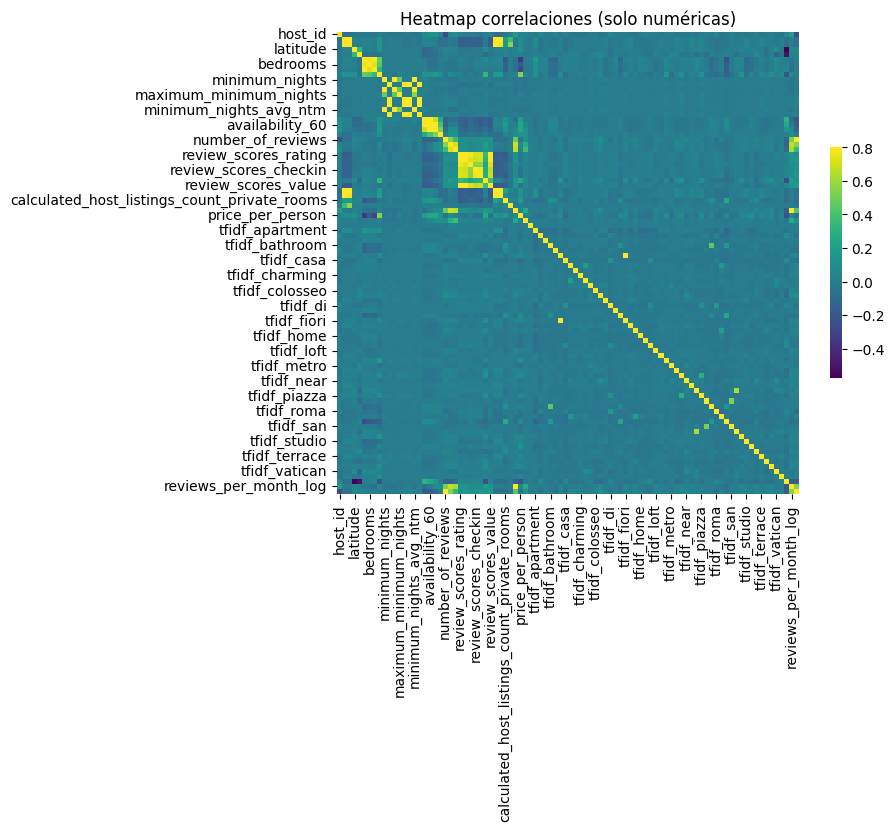

In [6]:
# Heatmap
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, vmax=0.8, cmap='viridis', square=True, cbar_kws={"shrink": .5})
plt.title("Heatmap correlaciones (solo numéricas)")
plt.show()

In [7]:
# Eliminar las variables redundantes

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr().abs()

upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

pairs = (
    upper_tri
      .stack()
      .reset_index()
      .rename(columns={'level_0':'feat1', 'level_1':'feat2', 0:'corr'})
)

# Seleccionamos todos los pares con correlación > 0,8
high_corr = pairs[pairs['corr'] > 0.8]

to_drop = high_corr['feat2'].unique().tolist()

print("Feature eliminado (corr > 0.8):", to_drop)

df_reduced = df.drop(columns=to_drop)

print(f"Pasamos de {df.shape[1]} a {df_reduced.shape[1]} columnas")


Feature eliminado (corr > 0.8): ['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'beds', 'minimum_minimum_nights', 'minimum_nights_avg_ntm', 'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'total_reviews_log', 'review_scores_accuracy', 'review_scores_value', 'reviews_per_month_log', 'tfidf_fiori']
Pasamos de 134 a 118 columnas


Crear modelos de predicción utilizando diferentes técnicas de
modelización (machine learning) justificando su uso,
determinando el nivel de precisión y detallando las bondades,
debilidades de cada técnica utilizada.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

target = 'price'
X = df_reduced.drop(columns=[target]).select_dtypes(include=[np.number])
y = df_reduced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0, random_state=42))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("\nRidge Regression Results:")
print(f" MAE : {mae:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R²  : {r2:.4f}")


Ridge Regression Results:
 MAE : 18.6637
 RMSE: 28.2535
 R²  : 0.8276


In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Definamos qué columnas eliminar para evitar fugas
leak_cols = ['price_per_person']
target   = 'price'

X = (
    df_reduced
    .drop(columns=leak_cols + [target], errors='ignore')
    .select_dtypes(include=[np.number])
)
y = df_reduced[target]

xgb_best = XGBRegressor(
    n_estimators=800,
    max_depth=8,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=1.0,
    gamma=0,
    reg_alpha=0,
    reg_lambda=10,
    random_state=42,
    n_jobs=-1
)

pipe_xgb = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
    ('model',   xgb_best)
])

mae_scores = -cross_val_score(
    pipe_xgb, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
rmse_scores = np.sqrt(-cross_val_score(
    pipe_xgb, X, y, cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
))
r2_scores = cross_val_score(
    pipe_xgb, X, y, cv=5,
    scoring='r2',
    n_jobs=-1
)

print("XGBoost Results:")
print(f"MAE : {mae_scores.mean():.2f}")
print(f"RMSE: {rmse_scores.mean():.2f}")
print(f"R²  : {r2_scores.mean():.3f}")



XGBoost Results:
MAE : 28.68
RMSE: 41.30
R²  : 0.649


In [10]:
from sklearn.ensemble import HistGradientBoostingRegressor

leak_cols = ['price_per_person']
target   = 'price'

# Preparamos X e y excluyendo fugas
X = (
    df_reduced
    .drop(columns=leak_cols + [target], errors='ignore')
    .select_dtypes(include=[np.number])
)
y = df_reduced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

hgb = HistGradientBoostingRegressor(
    max_iter=500,
    max_depth=8,
    learning_rate=0.05,
    random_state=42
)

# Pipeline: imputer → scaler → HGB
pipe_hgb = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
    ('model',   hgb)
])

# Fit & predict
pipe_hgb.fit(X_train, y_train)
y_pred_hgb = pipe_hgb.predict(X_test)


mae_hgb  = mean_absolute_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2_hgb   = r2_score(y_test, y_pred_hgb)

print("HistGradientBoosting Results:")
print(f" MAE : {mae_hgb:.2f}")
print(f" RMSE: {rmse_hgb:.2f}")
print(f" R²  : {r2_hgb:.3f}")



HistGradientBoosting Results:
 MAE : 27.10
 RMSE: 39.04
 R²  : 0.671


In [11]:
from sklearn.linear_model import LinearRegression

# Prepara X e y
leak_cols = ['price_log', 'price_per_person']
target = 'price'
X_lin = (
    df_reduced
    .drop(columns=leak_cols + [target], errors='ignore')
    .select_dtypes(include=[np.number])
)
y_lin = df_reduced[target]

# Train/test split
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

# Pipeline con LinearRegression
pipe_lin = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Entrenar y predecir
pipe_lin.fit(X_train_lin, y_train_lin)
y_pred_lin = pipe_lin.predict(X_test_lin)

# Cálculo de métricas
mae_lin  = mean_absolute_error(y_test_lin, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test_lin, y_pred_lin))
r2_lin   = r2_score(y_test_lin, y_pred_lin)

print("Linear Regression Results:")
print(f" MAE : {mae_lin:.2f}")
print(f" RMSE: {rmse_lin:.2f}")
print(f" R²  : {r2_lin:.3f}")


Linear Regression Results:
 MAE : 34.65
 RMSE: 47.57
 R²  : 0.511


In [15]:
# Stacking/Ensamble

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor

# Prepara X e y
leak_cols = ['price_per_person']
target   = 'price'

X = df_reduced.drop(columns=leak_cols + [target], errors='ignore').select_dtypes(include=[np.number])
y = df_reduced[target]

# Definición de estimadores base
estimators = [
    ('ridge', Ridge(alpha=1.0, random_state=42)),
    ('xgb', XGBRegressor(
        n_estimators=800,
        max_depth=8,
        learning_rate=0.03,
        subsample=0.6,
        colsample_bytree=1.0,
        reg_lambda=10,
        random_state=42,
        n_jobs=-1
    )),
    ('hgb', HistGradientBoostingRegressor(
        max_iter=200,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    ))
]

# Crea el Stacking Regressor
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# Pipeline completa
pipe_stack = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler()),
    ('stack',   stack)
])

# Validación cruzada
mae = -cross_val_score(pipe_stack, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1).mean()
rmse = np.sqrt(-cross_val_score(pipe_stack, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean())
r2   = cross_val_score(pipe_stack, X, y, cv=5, scoring='r2', n_jobs=-1).mean()

print("Stacking:")
print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R²: {r2:.3f}")


Stacking:
 MAE: 28.58
 RMSE: 41.30
 R²: 0.649
